In [1]:
!pip install numpy==1.24.0
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot

In [4]:
!pip install arch
from arch.unitroot import ADF,KPSS

  Using cached arch-7.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached arch-7.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (985 kB)


In [13]:
veri = pd.read_excel("/content/EVDS (8) (2).xlsx")
print(veri)

       Tarih    Tüfe
0    2003-01   94.77
1    2003-02   96.23
2    2003-03   98.12
3    2003-04   99.09
4    2003-05  100.04
..       ...     ...
175  2017-08  311.85
176  2017-09  313.88
177  2017-10  320.40
178  2017-11  325.18
179  2017-12  327.41

[180 rows x 2 columns]


In [14]:
tarih = pd.date_range("01.01.2003",periods=len(veri["Tarih"]),freq="M")
veri["Tarih"] = tarih
veri.set_index("Tarih",inplace=True)
print(veri)

              Tüfe
Tarih             
2003-01-31   94.77
2003-02-28   96.23
2003-03-31   98.12
2003-04-30   99.09
2003-05-31  100.04
...            ...
2017-08-31  311.85
2017-09-30  313.88
2017-10-31  320.40
2017-11-30  325.18
2017-12-31  327.41

[180 rows x 1 columns]


/tmp/ipython-input-14-2600867531.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tarih = pd.date_range("01.01.2003",periods=len(veri["Tarih"]),freq="M")


In [15]:
print(veri.isnull().sum())

Tüfe    0
dtype: int64


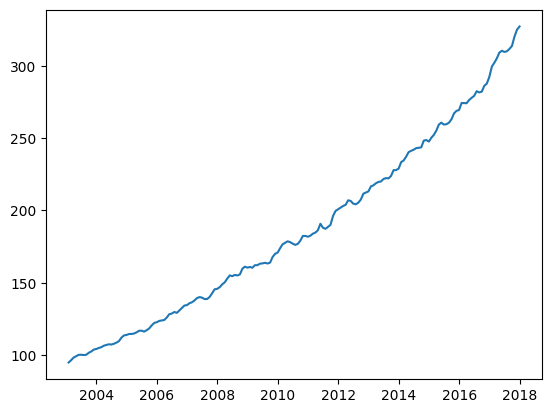

In [16]:
plt.plot(veri)
plt.show()

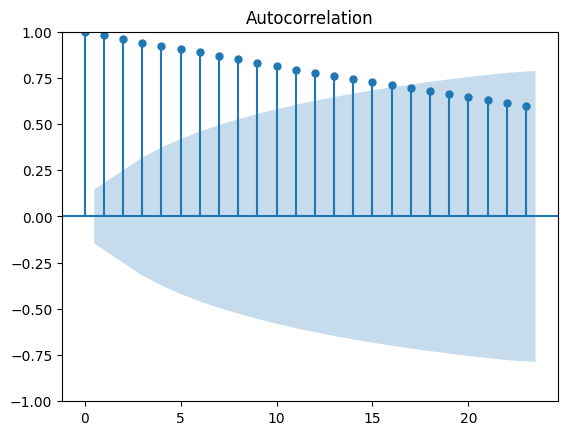

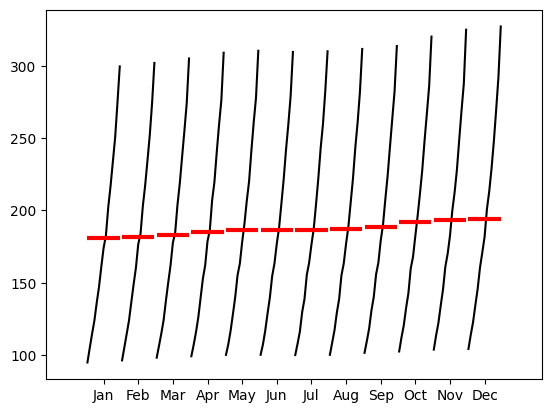

In [18]:
plot_acf(veri)
month_plot(veri)
plt.show()

In [19]:
verion = veri.iloc[:-24]
verison = veri.iloc[-24:]
print(verison)

              Tüfe
Tarih             
2016-01-31  274.44
2016-02-29  274.38
2016-03-31  274.27
2016-04-30  276.42
2016-05-31  278.02
2016-06-30  279.33
2016-07-31  282.58
2016-08-31  281.76
2016-09-30  282.27
2016-10-31  286.33
2016-11-30  287.81
2016-12-31  292.54
2017-01-31  299.74
2017-02-28  302.17
2017-03-31  305.24
2017-04-30  309.23
2017-05-31  310.61
2017-06-30  309.78
2017-07-31  310.24
2017-08-31  311.85
2017-09-30  313.88
2017-10-31  320.40
2017-11-30  325.18
2017-12-31  327.41


In [20]:
adf = ADF(verion)
kpss = KPSS(verion)
print(adf)
print(kpss)

   Augmented Dickey-Fuller Results   
Test Statistic                  3.805
P-value                         1.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  1.818
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [22]:
verifark = verion.diff().dropna()
adf1 = ADF(verifark)
kpss1 = KPSS(verifark)
print(adf1)
print(kpss1)

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.202
P-value                         0.206
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.625
P-value                         0.019
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [23]:
verifark2 = verifark.diff().diff().dropna()
adf2 = ADF(verifark2)
kpss2 = KPSS(verifark2)
print(adf2)
print(kpss2)

   Augmented Dickey-Fuller Results   
Test Statistic                 -7.836
P-value                         0.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.48 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.025
P-value                         0.990
Lags                                7
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [26]:
model = auto_arima(verion,seasonal=False,trace=True)
print(model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.68 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=609.606, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=599.205, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=607.608, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=576.637, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=578.351, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=574.637, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=597.207, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=576.351, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0]             : AIC=531.597, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=536.948, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(0,0,0)[0]             : AIC=533.584, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=529.081, Time=0.24 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=527.661, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(0,0,0)[0]             : AIC=533.132, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,3)(0,0,0)[0]             : AIC=518.711, Time=0.30 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=525.773, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,3)(0,0,0)[0]             : AIC=530.944, Time=0.19 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=529.773, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,4)(0,0,0)[0]             : AIC=527.036, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,4)(0,0,0)[0]             : AIC=inf, Time=0.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=516.823, Time=0.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec

Best model:  ARIMA(1,2,3)(0,0,0)[0] intercept
Total fit time: 10.175 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  156
Model:               SARIMAX(1, 2, 3)   Log Likelihood                -252.412
Date:                Wed, 02 Jul 2025   AIC                            516.823
Time:                        07:48:43   BIC                            535.045
Sample:                    01-31-2003   HQIC                           524.225
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0030      0.001      3.340      0.001       0.001     

In [27]:
model2 = auto_arima(verion,seasonal=False,trace=True,information_criterion="bic")
print(model2.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize bic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.65 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : BIC=615.680, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : BIC=608.315, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : BIC=610.645, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : BIC=588.785, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : BIC=593.535, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.48 sec
 ARIMA(2,2,0)(0,0,0)[0]             : BIC=583.748, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : BIC=603.280, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : BIC=588.499, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0]             : BIC=543.745, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0]             : BIC=546.058, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,1)(0,0,0)[0]             : BIC=548.769, Time=0.14 sec
 ARIMA(2,2,2)(0,0,0)[0]             : BIC=544.265, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,0,0)[0]             : BIC=539.809, Time=0.26 sec
 ARIMA(0,2,2)(0,0,0)[0]             : BIC=542.243, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,3)(0,0,0)[0]             : BIC=533.896, Time=0.26 sec
 ARIMA(0,2,3)(0,0,0)[0]             : BIC=537.921, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,3)(0,0,0)[0]             : BIC=549.166, Time=0.20 sec
 ARIMA(1,2,4)(0,0,0)[0]             : BIC=547.995, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,4)(0,0,0)[0]             : BIC=542.221, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,4)(0,0,0)[0]             : BIC=inf, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,3)(0,0,0)[0] intercept   : BIC=535.045, Time=0.63 sec

Best model:  ARIMA(1,2,3)(0,0,0)[0]          
Total fit time: 5.510 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  156
Model:               SARIMAX(1, 2, 3)   Log Likelihood                -254.356
Date:                Wed, 02 Jul 2025   AIC                            518.711
Time:                        07:48:52   BIC                            533.896
Sample:                    01-31-2003   HQIC                           524.879
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6213      0.104      5.982      0.000       0.418  

In [29]:
from statsmodels.tsa.arima.model import ARIMA
model3 = ARIMA(verion,order=(1,2,[1,3])).fit()
print(model3.summary())



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:                    Tüfe   No. Observations:                  156
Model:             ARIMA(1, 2, [1, 3])   Log Likelihood                -254.357
Date:                 Wed, 02 Jul 2025   AIC                            516.714
Time:                         07:53:36   BIC                            528.862
Sample:                     01-31-2003   HQIC                           521.648
                          - 12-31-2015                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6240      0.092      6.774      0.000       0.443       0.804
ma.L1         -1.5315      0.031    -49.040      0.000      -1.593      -1.470
ma.L3          0.5522      0.033     16.935 

In [32]:
q1 = acorr_ljungbox(model.resid())
q2 = acorr_ljungbox(model2.resid())
q3 = acorr_ljungbox(model3.resid)
print(q1)
print(q2)
print(q3)

      lb_stat  lb_pvalue
1   23.699766   0.000001
2   23.710929   0.000007
3   23.714709   0.000029
4   23.714782   0.000091
5   23.723785   0.000245
6   23.723879   0.000587
7   23.737271   0.001267
8   23.737653   0.002536
9   23.742264   0.004728
10  23.745184   0.008306
      lb_stat  lb_pvalue
1   23.731437   0.000001
2   23.739762   0.000007
3   23.743498   0.000028
4   23.743517   0.000090
5   23.752855   0.000242
6   23.753042   0.000580
7   23.767302   0.001252
8   23.767407   0.002507
9   23.772473   0.004676
10  23.773843   0.008224
      lb_stat  lb_pvalue
1   23.724940   0.000001
2   23.733089   0.000007
3   23.736766   0.000028
4   23.736794   0.000090
5   23.746042   0.000243
6   23.746235   0.000581
7   23.760458   0.001255
8   23.760556   0.002513
9   23.765545   0.004688
10  23.766863   0.008244


In [34]:
from statsmodels.tsa.holtwinters import  Holt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
holt = Holt(verion)
model4 = holt.fit(optimized=True,use_brute=True)
tahmin1 = model.predict(24)
tahmin2 = model2.predict(24)
tahmin3 = model3.forecast(24)
tahmin4 = model4.forecast(24)

def hata(y,tahmin):
  print("MSE:{} ".format(mean_squared_error(y,tahmin)))
  print("RMSE: {}".format(np.sqrt(mean_squared_error(y,tahmin))))
  print("MAE: {}".format(mean_absolute_error(y,tahmin)))
  print("R2: {} ".format(r2_score(y,tahmin)))

hata(verison,tahmin1)
hata(verison,tahmin2)
hata(verison,tahmin3)
hata(verison,tahmin4)


MSE:74.8073122403129 
RMSE: 8.649122050261107
MAE: 6.544302992635569
R2: 0.7453361591891287 
MSE:86.47068109676638 
RMSE: 9.29896129128229
MAE: 6.9688639988415915
R2: 0.7056309723454057 
MSE:86.49776857669015 
RMSE: 9.300417656035139
MAE: 6.970093188652612
R2: 0.7055387594123557 
MSE:136.95955734495692 
RMSE: 11.70297215859958
MAE: 8.96175653237794
R2: 0.5337535079835716 


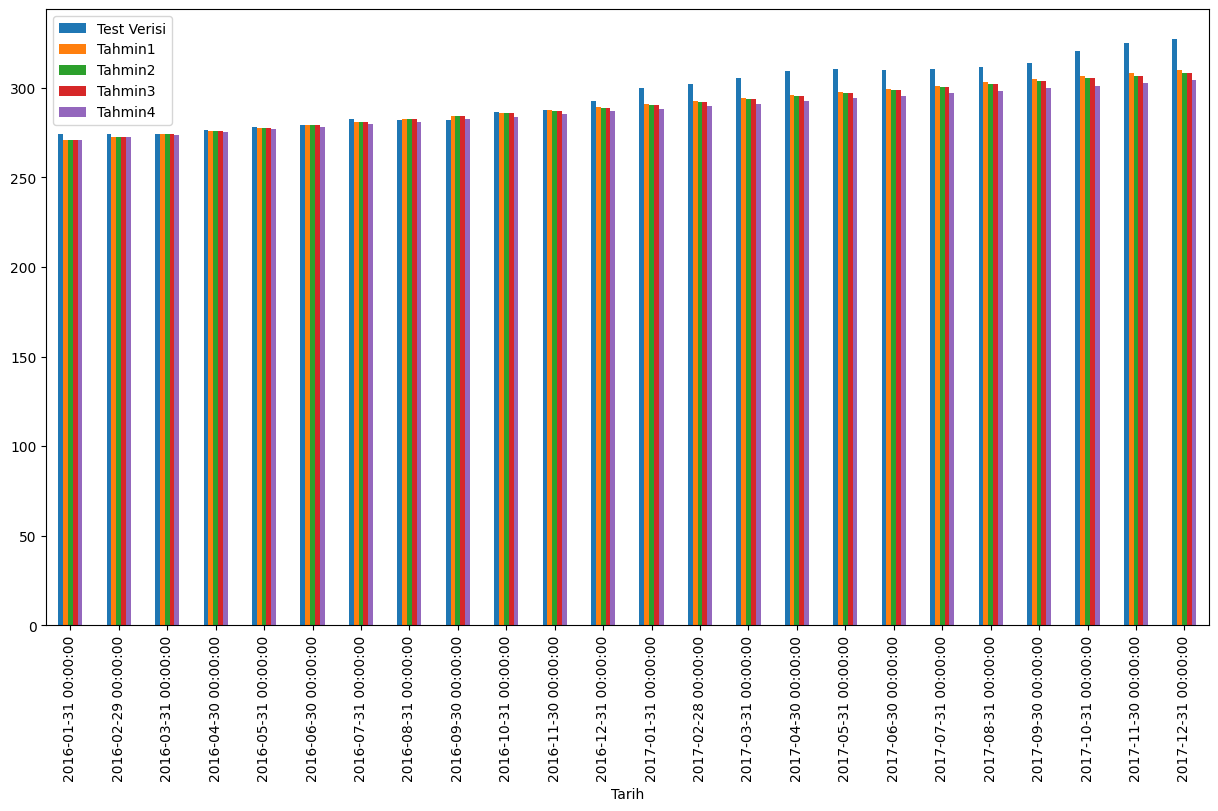

In [42]:
df=pd.DataFrame()
df["Test Verisi"] = verison
df["Tahmin1"] = tahmin1
df["Tahmin2"] = tahmin2
df["Tahmin3"] = tahmin3
df["Tahmin4"] = tahmin4

df.plot(kind="bar",figsize=(15,8))
plt.show()